In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline

In [3]:
import os
os.getcwd()

'C:\\Users\\Snehal Sanap\\OneDrive\\Desktop\\AIML_STUDY\\INeuron'

In [18]:
#loading the data
df= pd.read_csv('C:\\Users\\Snehal Sanap\\OneDrive\\Desktop\\AIML_STUDY\\INeuron\\Data Analytics\\Projects\\EDA_Python\\hour.csv')
df.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#basic sanity checks

In [6]:
df.columns

Index(['index', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'demand'],
      dtype='object')

In [7]:
df.shape

(17379, 17)

In [9]:
df.isnull().sum()

index         0
date          0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
demand        0
dtype: int64

In [10]:
df[~df.apply(np.isreal).all(1)]

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  demand      17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#feature selection - dropping constant value/ not important features

In [19]:
df.drop(['index', 'date', 'casual', 'registered'], axis=1,inplace=True)
df.shape

(17379, 13)

# Data Visualizations 
### Continuous variables distribution

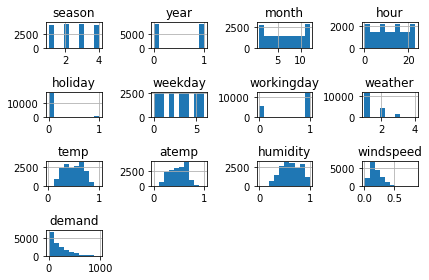

In [13]:
df.hist()
plt.tight_layout()

<AxesSubplot:xlabel='atemp', ylabel='Count'>

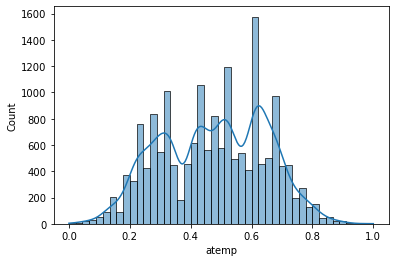

In [5]:
sns.histplot(df['atemp'], kde=True)

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

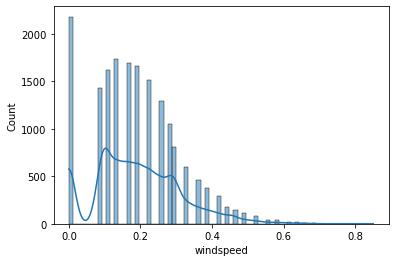

In [14]:
#now the windspeed looks kind of not normally distributed (logND/gamma distn) so fit it to known theoretical distn
sns.histplot(df['windspeed'], kde=True)

<AxesSubplot:xlabel='windspeed'>

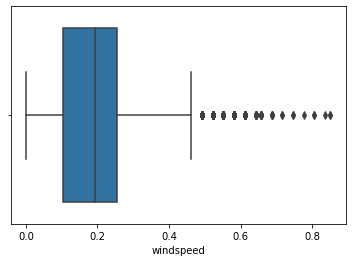

In [7]:
sns.boxplot(x='windspeed', data = df)

In [8]:
#boxplot also confirms our speculations regarding the distribution of the windspeed data --rightly skewed data
mean= df['windspeed'].mean()
var = df['windspeed'].var()
print(mean, var)

0.1900976063064631 0.01496713152724351


In [20]:
alpha= mean**2/var
beta = var/mean
print(alpha , beta)

2.414430571260062 0.07873392946944564


In [10]:
import scipy.stats as stats

In [21]:
#fit the winspeed data to gamma distn
stats.gamma.fit(df['windspeed'])

(9.02406144388155, -0.18052159017465336, 0.04107010960318003)

In [22]:
#generating random data as theoretical distn 
data_gen = stats.gamma.rvs(9.02406144388155, -0.18052159017465336, 0.04107010960318003,size=len(df['windspeed']))
len(data_gen)

17379

<AxesSubplot:ylabel='Count'>

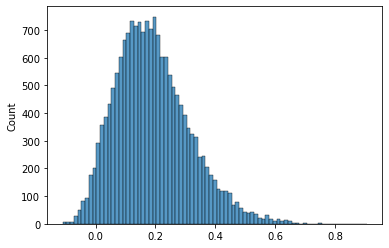

In [14]:
sns.histplot(data_gen)

In [15]:
#to check if the data fits this distn or no... goodness of fit testing
#creating observed_freq of our experimental data : using pd.cut we create 10 bins of our data
d1 = pd.cut(df.windspeed, bins=10).value_counts()
data = pd.DataFrame(d1)
obs_fq = data['windspeed']

In [24]:
obs_fq

(0.0851, 0.17]         6475
(0.17, 0.255]          4465
(0.255, 0.34]          2458
(-0.000851, 0.0851]    2180
(0.34, 0.425]          1137
(0.425, 0.51]           434
(0.51, 0.595]           167
(0.595, 0.681]           48
(0.681, 0.766]            9
(0.766, 0.851]            6
Name: windspeed, dtype: int64

In [23]:
#expected freq
d2 = pd.cut(data_gen, bins=10).value_counts()
data = pd.DataFrame(d2)
exp_fq = data[0]

In [25]:
exp_fq 

(-0.125, -0.0185]     338
(-0.0185, 0.0866]    3400
(0.0866, 0.192]      5843
(0.192, 0.297]       4663
(0.297, 0.402]       2109
(0.402, 0.507]        740
(0.507, 0.612]        234
(0.612, 0.717]         45
(0.717, 0.822]          5
(0.822, 0.927]          2
Name: 0, dtype: int64

In [26]:
stats.chisquare(exp_fq ,obs_fq )

Power_divergenceResult(statistic=14638.596727519433, pvalue=0.0)

In [ ]:
#since pvalue<0.5 , we reject the hypothesis stating that both follows the same  distribution , i.e. our data doesnt follow the gamma distn

In [31]:
df.columns

Index(['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'demand'],
      dtype='object')

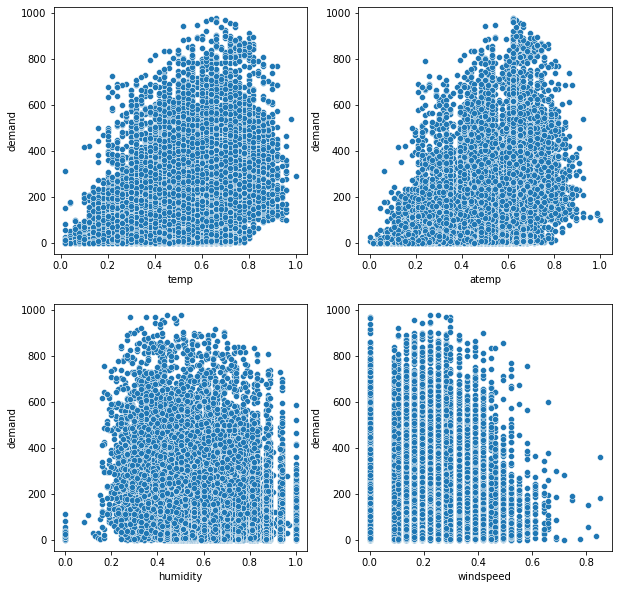

In [34]:
# BIVARIATE ANALYSIS
fig, ((ax1,ax2), (ax3,ax4))= plt.subplots(2,2, figsize=(10,10))
ax = sns.scatterplot(x ='temp', y='demand', data=df, ax=ax1)
#ax[1].set_title= ('Temperature v/s Demand')
ax = sns.scatterplot(x ='atemp', y='demand', data=df, ax=ax2)
#ax[2].set_title=('aTemp v/s Demand')
ax = sns.scatterplot(x ='humidity', y='demand', data=df, ax=ax3)
#ax[3].set_title= ('Humidity v/s Demand')
ax = sns.scatterplot(x ='windspeed', y='demand', data=df, ax=ax4)
#ax[4].set_title= ('Windspeed v/s Demand')
plt.show()

plt.subplot(2,2,1)
plt.title('Temperature Vs Demand')
plt.scatter(bikes_prep['temp'], bikes_prep['demand'], s=2, c='g')

plt.subplot(2,2,2)
plt.title('aTemp Vs Demand')
plt.scatter(bikes_prep['atemp'], bikes_prep['demand'], s=2, c='b')

plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.scatter(bikes_prep['humidity'], bikes_prep['demand'], s=2, c='m')

plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.scatter(bikes_prep['windspeed'], bikes_prep['demand'], s=2, c='c')

plt.tight_layout()

In [ ]:
#observations: we can say that temp and atemp shows some kind of positive linearity with the demand
#both the plots for temp and atemp v/s demand look kind of similar so we can say there will be some correlation b/w temp and atemp too
#humidity v/s demand is a cloud stating no clear linear relationship between them, we can say it has no much impact on demand
#windspeed we see after a certain point( say 0.3 or something) it shows a negative correlatin between them

In [37]:
# CATEGORICAL FEATURES
df.columns

Index(['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'demand'],
      dtype='object')

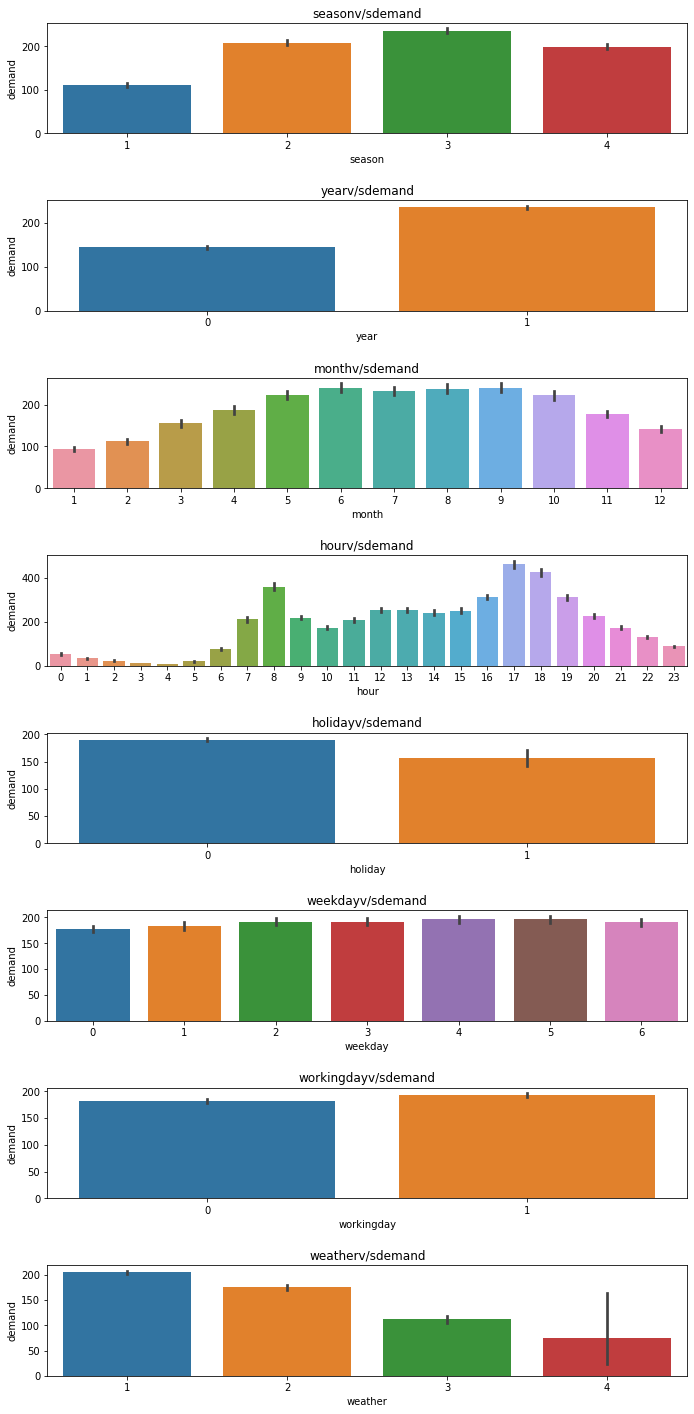

In [47]:
cols =['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather']
fig, ax=plt.subplots(len(cols), figsize=(10,20))

for i,col in enumerate(cols):
    sns.barplot(x=col, y='demand', data= df, ax=ax[i])
    ax[i].set_title(col + ' v/s ' + 'demand')
plt.tight_layout(pad=2)
plt.show()

#observation:
#demand is high for bikes in fall, summer, winter whereas its less in spring
#we can say from may - oct we had high demand 
#so we can say as season or month changes the demand for bikes also changes therefore both of them have an impact on demand
#similarly holiday v/s demand we see non-holiday we have more demand compared to holiday days
#year wise we can say we can drop year as we just have two year data and it is not that insighful to predict if we had more years then the visualization would have ben impactful
#whereas weekday and working day we can see that demand is almost same on all days may be because people might be using bikes on weekdays to 
#go back and forth to office/work and on weekends they might use it for entertainment purposes to visit some public places, rides etc
#so its safe to say we can drop these features as they wont have that much impact on demand as compared to others
#when we see demand per hour we can say its changing drastically each hour -- from 8-10am and 4-8pm we can say we have high demands for bike rather than 
#other hours of the day , thiose hrs being the work hrs
#also for demand per weather  when weathers are clear demand is high when weather becomes unstable demand falls

colors = ['g', 'r', 'm', 'b']

plt.subplot(3,3,1)
plt.title('Demand per Season')
cat_list = bikes_prep['season'].unique()
cat_average = bikes_prep.groupby('season').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,2)
plt.title('Demand per month')
cat_list = bikes_prep['month'].unique()
cat_average = bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,3)
plt.title('Demand per Holiday')
cat_list = bikes_prep['holiday'].unique()
cat_average = bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,4)
plt.title('Demand per Weekday')
cat_list = bikes_prep['weekday'].unique()
cat_average = bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,5)
plt.title('Demand per Year')
cat_list = bikes_prep['year'].unique()
cat_average = bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,6)
plt.title('Demand per hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,7)
plt.title('Demand per Workingday')
cat_list = bikes_prep['workingday'].unique()
cat_average = bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,8)
plt.title('Demand per Weather')
cat_list = bikes_prep['weather'].unique()
cat_average = bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.tight_layout()

<AxesSubplot:xlabel='demand', ylabel='Count'>

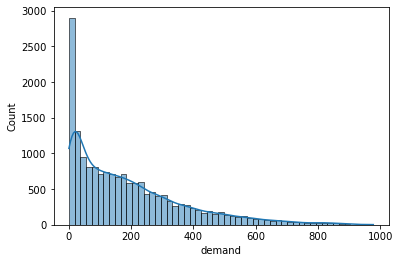

In [49]:
#target variable distribution
sns.histplot(df['demand'], kde=True)
#it follows a log ND with the assumption that log of this data will be ~a ND

In [50]:
df.demand.describe()
#we can say that:
#there is a huge difference between the max and median value & mean> median values indicating presence of outliers in data 
#but the differnecr b/w mean and median is not that much
#somedays there is a huge demand and some its as less as min value=1 --outlier presence therefor lets see using boxplot

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

C:\Users\Snehal Sanap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='demand'>

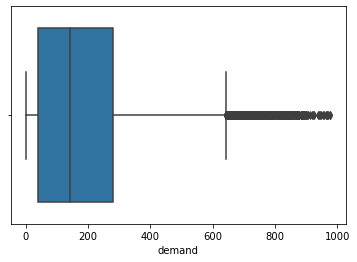

In [51]:
sns.boxplot(df['demand'])
#so we see boxplot confirms our observation that post 630 or 650 approx are outliers

In [52]:
#we can get the quantile info too
df['demand'].quantile([0.05, 0.1,0.15,0.9,0.95, 0.99])

#we can see that 5% of the times demand is less than 5, 10% times <9 , 90% of the times <451.20, 99% of times demand is less than 782 ie, i.e.
#only 1% of times demand is more than 782 and only 5% of times its >563
#so most of the data/demand lies between 5-563 around (5-95%), so all other values are outliers

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [53]:
#lets check linearity using corrleation matrix
cols=['temp', 'atemp','humidity', 'windspeed', 'demand']
corr = df[cols].corr()
corr

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


<AxesSubplot:>

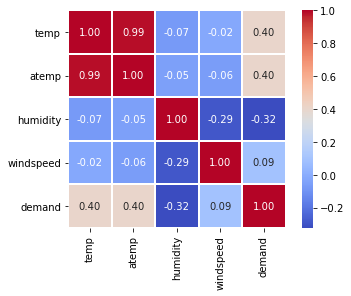

In [56]:
sns.heatmap(corr, cmap='coolwarm', annot=True, linewidth=.1,square=True,fmt='.2f')

In [ ]:
#observations: atemp and temp are 99% correleated to each other as we predicted earlier and we might have to drop one of them
#none of the variables are very strongly corelated to demand variable
#highest correlation with the target variable is of temp and atemp around 40%
#humidity shows some negative correlation with target var demand
#lowest is windspeed ~ 0 so we can drop it

In [57]:
#so based on all earlier ovservations dropping the irrelvant features
df.drop(['weekday', 'year', 'workingday', 'atemp', 'windspeed'], axis=1, inplace = True)
df.shape

(17379, 8)

In [59]:
#now our data looks time series data with columns like season, month, hours etc so the main deal with time series data for target variable is how many ;lags 
#it depends on ..so to check that we will use autocorrelation upto max 15 lags
dff1 = pd.to_numeric(df['demand'], downcast='float')
dff1

0         16.0
1         40.0
2         32.0
3         13.0
4          1.0
         ...  
17374    119.0
17375     89.0
17376     90.0
17377     61.0
17378     49.0
Name: demand, Length: 17379, dtype: float32

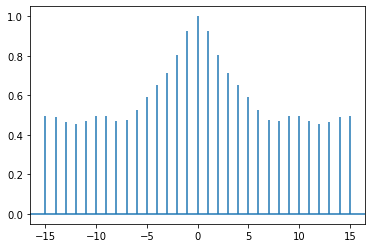

In [62]:
plt.acorr(dff1, maxlags=15)
plt.show()
#if we take 60% has high corrln then we get upto 5 max lags, lets consider 3 lag variable for our data

<AxesSubplot:>

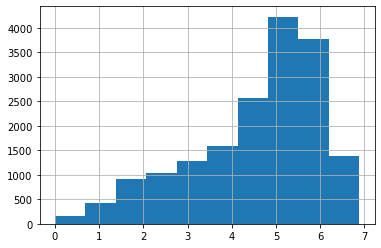

In [63]:
#first lets just nirmalize the demand var from log ND ~ ND.. # Log Normalise the feature 'Demand'
a = np.log(df['demand'])
a.hist()
#we dont get exact ND but a fairly ND with some left skewness

In [64]:
df['demand']=np.log(df['demand'])

In [67]:
#adding three lag variables to demand in our data
t_1 = df['demand'].shift(+1).to_frame()
t_1.columns=['t-1']

In [69]:
t_2 = df['demand'].shift(+2).to_frame()
t_2.columns=['t-2']

t_3= df['demand'].shift(+3).to_frame()
t_3.columns=['t-3']

In [71]:
df = pd.concat([df, t_1,t_2,t_3], axis=1)
df.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879


In [72]:
df.shape

(17379, 11)

In [73]:
df.dropna(inplace=True) #1st 3 rows in 17379 rows is ok
df.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


In [74]:
df.shape

(17376, 11)

In [75]:
#now encoding cat var
df.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [76]:
#convert from convert to category
df['season']= df['season'].astype('category')
df['month']= df['month'].astype('category')
df['hour']= df['hour'].astype('category')
df['holiday']= df['holiday'].astype('category')
df['weather']= df['weather'].astype('category')

In [77]:
df.dtypes

season      category
month       category
hour        category
holiday     category
weather     category
temp         float64
humidity     float64
demand       float64
t-1          float64
t-2          float64
t-3          float64
dtype: object

In [78]:
df.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


In [79]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#now our data is ready for further processing/modelling/predictions